### 데이터 읽기 및 이용데이터 수정

In [1]:
import pandas as pd
customer = pd.read_csv('./database/customer_join.csv', encoding='cp949')
uselog_months = pd.read_csv('./database/use_log_months.csv', encoding='cp949')

In [2]:
len(uselog_months)

36842

In [3]:
year_months = list(uselog_months["연월"].unique())

In [4]:
year_months

[201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903]

In [5]:
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [6]:
uselog = pd.DataFrame()

# 2018.05부터 2019.03까지
for i in range(1, len(year_months)):
    # 각 연월 데이터만 tmp에 저장(예 : i == 1, 2018.05 데이터만)
    tmp = uselog_months.loc[uselog_months["연월"]==year_months[i]]
    # 칼럼명 변경 count -> count_0
    tmp = tmp.rename(columns={"count":"count_0"})
    # 1개월 전 데이터(2018.05일 경우 2018.04 데이터)를 tmp_before에 저장
    tmp_before = uselog_months.loc[uselog_months["연월"]==year_months[i-1]]
    # 연월 칼럼 삭제
    del tmp_before["연월"]
    # 칼럼명 변경 count -> count_1
    tmp_before = tmp_before.rename(columns={"count":"count_1"})
    # 데이터 결합
    tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")
    # 만들어둔 데이터 프레임 변수에 결합
    uselog = pd.concat([uselog, tmp], ignore_index=True)
uselog.head()

,연월,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0


In [7]:
# 2018.04의 데이터가 빠진 모습
len(uselog)

33851

### 탈퇴전월의 탈퇴고객데이터 작성

In [7]:
customer[customer['is_deleted'] == 1].head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
1,AS008805,XXXXX,C01,M,2018-06-07,2019-03-31,CA2,1,0_종일,10500,0_입회비반액할인,4.000000,4.0,8,1,1,2019-03-31,9
2,AS009013,XXXXX,C03,M,2017-08-01,2018-04-30,CA2,1,2_야간,6000,0_입회비반액할인,2.000000,2.0,2,2,0,2018-04-30,8
7,AS015746,XXXXX,C01,M,2017-12-01,2018-08-31,CA3,1,0_종일,10500,1_입회비무료,2.600000,3.0,4,1,0,2018-08-31,8
8,AS019120,XXXX,C01,M,2018-08-07,2018-10-31,CA1,1,0_종일,10500,2_일반,5.333333,5.0,8,3,0,2018-10-31,2
11,AS025956,XXXXXX,C01,M,2018-05-09,2019-02-28,CA2,1,0_종일,10500,0_입회비반액할인,4.400000,4.5,7,1,1,2019-02-28,9


In [8]:
# dateutil.relativedelta : 날짜와 시간 간의 상대적인 차이를 계산할 수 있는 기능을 제공
from dateutil.relativedelta import relativedelta
# 탈퇴한 고객 데이터만 변수에 저장
exit_customer = customer.loc[customer["is_deleted"]==1]

In [9]:
# 칼럼을 만들고 거기에 None 값을 넣음
exit_customer.loc[:, "exit_date"] = None

C:\Users\ysj\AppData\Local\Temp\ipykernel_27552\2506978071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer.loc[:, "exit_date"] = None


In [10]:
exit_customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
1,AS008805,XXXXX,C01,M,2018-06-07,2019-03-31,CA2,1,0_종일,10500,0_입회비반액할인,4.000000,4.0,8,1,1,2019-03-31,9,None
2,AS009013,XXXXX,C03,M,2017-08-01,2018-04-30,CA2,1,2_야간,6000,0_입회비반액할인,2.000000,2.0,2,2,0,2018-04-30,8,None
7,AS015746,XXXXX,C01,M,2017-12-01,2018-08-31,CA3,1,0_종일,10500,1_입회비무료,2.600000,3.0,4,1,0,2018-08-31,8,None
8,AS019120,XXXX,C01,M,2018-08-07,2018-10-31,CA1,1,0_종일,10500,2_일반,5.333333,5.0,8,3,0,2018-10-31,2,None
11,AS025956,XXXXXX,C01,M,2018-05-09,2019-02-28,CA2,1,0_종일,10500,0_입회비반액할인,4.400000,4.5,7,1,1,2019-02-28,9,None


In [11]:
# end_date의 type 변경
exit_customer.loc[:, "end_date"] = pd.to_datetime(exit_customer["end_date"])
# 탈퇴한 회원 수 만큼 반복
for i in range(len(exit_customer)):
    # -1 = exit_date, 5 = end_customer / exit_date에 등록이 끝난 달의 전 달을 넣는다
    exit_customer.iloc[i, -1] = exit_customer.iloc[i, 5] - relativedelta(months=1)
exit_customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
1,AS008805,XXXXX,C01,M,2018-06-07,2019-03-31 00:00:00,CA2,1,0_종일,10500,0_입회비반액할인,4.000000,4.0,8,1,1,2019-03-31,9,2019-02-28 00:00:00
2,AS009013,XXXXX,C03,M,2017-08-01,2018-04-30 00:00:00,CA2,1,2_야간,6000,0_입회비반액할인,2.000000,2.0,2,2,0,2018-04-30,8,2018-03-30 00:00:00
7,AS015746,XXXXX,C01,M,2017-12-01,2018-08-31 00:00:00,CA3,1,0_종일,10500,1_입회비무료,2.600000,3.0,4,1,0,2018-08-31,8,2018-07-31 00:00:00
8,AS019120,XXXX,C01,M,2018-08-07,2018-10-31 00:00:00,CA1,1,0_종일,10500,2_일반,5.333333,5.0,8,3,0,2018-10-31,2,2018-09-30 00:00:00
11,AS025956,XXXXXX,C01,M,2018-05-09,2019-02-28 00:00:00,CA2,1,0_종일,10500,0_입회비반액할인,4.400000,4.5,7,1,1,2019-02-28,9,2019-01-28 00:00:00


In [12]:
# 연월에 등록기간이 끝난 날의 년도와 월을 넣는다
exit_customer.loc[:, "연월"] = pd.to_datetime(exit_customer.loc[:,"exit_date"]).dt.strftime("%Y%m")
# 연월의 type을 string으로 변경
uselog.loc[:, "연월"] = uselog.loc[:, "연월"].astype(str)
# 새로운 변수 만들고 이용로그와 exit_customer 데이터를 "customer_id", "연월" 기준에 맞춰 데이터 결합
exit_uselog = pd.merge(uselog, exit_customer, on=["customer_id", "연월"], how="left")
print(len(uselog))
# 탈퇴한 회원의 데이터만 넣어서 탈퇴하지 않은 회원의 데이터가 들어가있지 않은 모습이다.
exit_uselog.head()

33851


C:\Users\ysj\AppData\Local\Temp\ipykernel_27552\3144863483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer.loc[:, "연월"] = pd.to_datetime(exit_customer.loc[:,"exit_date"]).dt.strftime("%Y%m")
C:\Users\ysj\AppData\Local\Temp\ipykernel_27552\3144863483.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['201805' '201805' '201805' ... '201903' '201903' '201903']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  uselog.loc[:, "연월"] = uselog.loc[:, "연월"].astype(str)


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# name에 결측지가 있는 데이터만 삭제
exit_uselog = exit_uselog.dropna(subset=["name"])
# 길이 확인
print(len(exit_uselog))
# 손님 id의 중복이 없는 지 확인
print(len(exit_uselog["customer_id"].unique()))
exit_uselog.head()

1104
1104


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30 00:00:00,CA1,...,10500.0,2_일반,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30 00:00:00
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30 00:00:00,CA1,...,10500.0,2_일반,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30 00:00:00
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30 00:00:00,CA1,...,10500.0,2_일반,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30 00:00:00
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30 00:00:00,CA1,...,10500.0,2_일반,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30 00:00:00
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30 00:00:00,CA1,...,6000.0,2_일반,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30 00:00:00


### 지속회원의 데이터 작성

In [14]:
# 변수 만들고 탈퇴하지 않은 회원 데이터만 저장
conti_customer = customer.loc[customer["is_deleted"]==0]
# 회원 id를 기준으로 이용로그와 지속회원 데이터를 결합
conti_uselog = pd.merge(uselog, conti_customer, on=["customer_id"], how="left")
conti_uselog.head()

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201805,AS002855,5,4.0,XXXX,C03,F,2016-11-01,NaN,CA1,...,2_야간,6000.0,2_일반,4.500000,5.0,7.0,2.0,1.0,2019-04-30,29.0
1,201805,AS009373,4,3.0,XX,C01,F,2015-11-01,NaN,CA1,...,0_종일,10500.0,2_일반,5.083333,5.0,7.0,3.0,1.0,2019-04-30,41.0
2,201805,AS015233,7,NaN,XXXXX,C01,M,2018-05-13,NaN,CA2,...,0_종일,10500.0,0_입회비반액할인,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0
3,201805,AS015315,3,6.0,XXXXX,C01,M,2015-07-01,NaN,CA1,...,0_종일,10500.0,2_일반,4.833333,5.0,7.0,3.0,1.0,2019-04-30,45.0
4,201805,AS015739,5,7.0,XXXXX,C03,M,2017-06-01,NaN,CA1,...,2_야간,6000.0,2_일반,5.583333,5.5,8.0,4.0,1.0,2019-04-30,22.0


In [15]:
# uselog는 2018.05부터 데이터기 떄문에 샘플개수가 33851
print(len(conti_uselog))
# 이름에 결측치가 있는 데이터 삭제
conti_uselog = conti_uselog.dropna(subset=["name"])
print(len(conti_uselog))

33851
27422


In [16]:
# sample 메서드는 데이터프레임의 행이나 열에서 무작위 샘플을 추출할 수 있게 해줍니다.
# frac: 데이터프레임에서 추출할 샘플의 비율을 지정합니다. n 매개변수가 지정된 경우, frac는 무시됩니다.
# 예시: frac=0.5이면 데이터프레임의 50%를 무작위로 선택합니다.
conti_uselog = conti_uselog.sample(frac=1).reset_index(drop=True)
# drop_duplicates 메서드는 데이터프레임에서 중복된 행을 제거하는 데 사용됩니다.
# subset: 중복을 판단할 열 또는 열 목록을 지정합니다. 이 매개변수를 사용하면 특정 열만 기준으로 중복을 제거할 수 있습니다.
conti_uselog = conti_uselog.drop_duplicates(subset="customer_id")
# 길이 출력
print(len(conti_uselog))
# 손님 별로 랜덤으로 하나의 로그 데이터만 저장
conti_uselog.head()

2842


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201811,OA796761,10,9.0,XX,C02,F,2018-08-03,NaN,CA1,...,1_주간,7500.0,2_일반,8.875000,9.0,10.0,7.0,1.0,2019-04-30,8.0
1,201809,HD074404,5,3.0,XXXXX,C01,F,2016-04-01,NaN,CA1,...,0_종일,10500.0,2_일반,5.083333,5.0,7.0,3.0,1.0,2019-04-30,36.0
2,201808,AS703258,9,7.0,XXXX,C02,F,2017-08-01,NaN,CA2,...,1_주간,7500.0,0_입회비반액할인,5.916667,6.0,9.0,1.0,1.0,2019-04-30,20.0
3,201807,PL731429,8,8.0,XXXXX,C03,M,2017-12-01,NaN,CA3,...,2_야간,6000.0,1_입회비무료,6.500000,6.5,9.0,3.0,1.0,2019-04-30,16.0
4,201805,AS535481,8,4.0,XXXX,C01,F,2017-05-01,NaN,CA1,...,0_종일,10500.0,2_일반,5.000000,4.0,8.0,3.0,1.0,2019-04-30,23.0


In [17]:
# 예측 데이터, 지속회원과 탈퇴회원을 결합
predict_data = pd.concat([conti_uselog, exit_uselog],ignore_index=True)
print(len(predict_data))
predict_data.head()

3946


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201811,OA796761,10,9.0,XX,C02,F,2018-08-03,NaN,CA1,...,7500.0,2_일반,8.875000,9.0,10.0,7.0,1.0,2019-04-30,8.0,NaN
1,201809,HD074404,5,3.0,XXXXX,C01,F,2016-04-01,NaN,CA1,...,10500.0,2_일반,5.083333,5.0,7.0,3.0,1.0,2019-04-30,36.0,NaN
2,201808,AS703258,9,7.0,XXXX,C02,F,2017-08-01,NaN,CA2,...,7500.0,0_입회비반액할인,5.916667,6.0,9.0,1.0,1.0,2019-04-30,20.0,NaN
3,201807,PL731429,8,8.0,XXXXX,C03,M,2017-12-01,NaN,CA3,...,6000.0,1_입회비무료,6.500000,6.5,9.0,3.0,1.0,2019-04-30,16.0,NaN
4,201805,AS535481,8,4.0,XXXX,C01,F,2017-05-01,NaN,CA1,...,10500.0,2_일반,5.000000,4.0,8.0,3.0,1.0,2019-04-30,23.0,NaN


### 예측할 달의 재적기간을 작성

In [18]:
# 새 칼럼 생성 및 0 넣기
predict_data["period"] = 0

In [19]:
predict_data.head()

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,period
0,201811,OA796761,10,9.0,XX,C02,F,2018-08-03,NaN,CA1,...,2_일반,8.875000,9.0,10.0,7.0,1.0,2019-04-30,8.0,NaN,0
1,201809,HD074404,5,3.0,XXXXX,C01,F,2016-04-01,NaN,CA1,...,2_일반,5.083333,5.0,7.0,3.0,1.0,2019-04-30,36.0,NaN,0
2,201808,AS703258,9,7.0,XXXX,C02,F,2017-08-01,NaN,CA2,...,0_입회비반액할인,5.916667,6.0,9.0,1.0,1.0,2019-04-30,20.0,NaN,0
3,201807,PL731429,8,8.0,XXXXX,C03,M,2017-12-01,NaN,CA3,...,1_입회비무료,6.500000,6.5,9.0,3.0,1.0,2019-04-30,16.0,NaN,0
4,201805,AS535481,8,4.0,XXXX,C01,F,2017-05-01,NaN,CA1,...,2_일반,5.000000,4.0,8.0,3.0,1.0,2019-04-30,23.0,NaN,0


In [20]:
# 새 칼럼 생성 및 연월 데이터 타입 변경 밎 년도랑 월만 넣기
predict_data.loc[:, "now_date"] = pd.to_datetime(predict_data.loc[:, "연월"], format="%Y%m")
predict_data.loc[:, "start_date"] = pd.to_datetime(predict_data.loc[:, "start_date"])
# predict_data만큼 반복
for i in range(len(predict_data)):
    # -1 == 'now_date', 7 == 'start_date'
    delta = relativedelta(predict_data.iloc[i]['now_date'], predict_data.iloc[i]['start_date'])
    # -2 == 'period'
    predict_data.iloc[i, -2] = int(delta.years*12 + delta.months)
predict_data.head(10)

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,period,now_date
0,201811,OA796761,10,9.0,XX,C02,F,2018-08-03 00:00:00,NaN,CA1,...,8.875000,9.0,10.0,7.0,1.0,2019-04-30,8.0,NaN,2,2018-11-01
1,201809,HD074404,5,3.0,XXXXX,C01,F,2016-04-01 00:00:00,NaN,CA1,...,5.083333,5.0,7.0,3.0,1.0,2019-04-30,36.0,NaN,29,2018-09-01
2,201808,AS703258,9,7.0,XXXX,C02,F,2017-08-01 00:00:00,NaN,CA2,...,5.916667,6.0,9.0,1.0,1.0,2019-04-30,20.0,NaN,12,2018-08-01
3,201807,PL731429,8,8.0,XXXXX,C03,M,2017-12-01 00:00:00,NaN,CA3,...,6.500000,6.5,9.0,3.0,1.0,2019-04-30,16.0,NaN,7,2018-07-01
4,201805,AS535481,8,4.0,XXXX,C01,F,2017-05-01 00:00:00,NaN,CA1,...,5.000000,4.0,8.0,3.0,1.0,2019-04-30,23.0,NaN,12,2018-05-01
5,201812,PL923434,6,4.0,XX,C03,M,2018-02-01 00:00:00,NaN,CA1,...,7.333333,8.0,12.0,3.0,1.0,2019-04-30,14.0,NaN,10,2018-12-01
6,201902,AS627304,5,6.0,XXXX,C03,M,2018-03-01 00:00:00,NaN,CA1,...,8.083333,8.5,11.0,5.0,1.0,2019-04-30,13.0,NaN,11,2019-02-01
7,201903,IK850378,5,6.0,XXXX,C01,M,2016-12-01 00:00:00,NaN,CA1,...,5.333333,6.0,7.0,3.0,1.0,2019-04-30,28.0,NaN,27,2019-03-01
8,201811,IK061114,3,6.0,XXXXX,C03,M,2016-08-01 00:00:00,NaN,CA1,...,5.083333,5.0,7.0,3.0,1.0,2019-04-30,32.0,NaN,27,2018-11-01
9,201901,PL746909,3,5.0,XXXXXX,C03,M,2016-11-01 00:00:00,NaN,CA1,...,4.583333,4.5,8.0,2.0,1.0,2019-04-30,29.0,NaN,26,2019-01-01


### 결측치 제거

In [21]:
predict_data.isna().sum()

연월                      0
customer_id             0
count_0                 0
count_1               266
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2842
period                  0
now_date                0
dtype: int64

In [22]:
predict_data = predict_data.dropna(subset=["count_1"])
predict_data.isna().sum()

연월                      0
customer_id             0
count_0                 0
count_1                 0
name                    0
class                   0
gender                  0
start_date              0
end_date             2628
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2628
period                  0
now_date                0
dtype: int64

### 문자열 변수를 처리할 수 있게 가공

In [23]:
target_col = ["campaign_name", "class_name", "gender", "count_1", "routine_flg", "period", "is_deleted"]
predict_data = predict_data[target_col]
predict_data.head()

,campaign_name,class_name,gender,count_1,routine_flg,period,is_deleted
0,2_일반,1_주간,F,9.0,1.0,2,0.0
1,2_일반,0_종일,F,3.0,1.0,29,0.0
2,0_입회비반액할인,1_주간,F,7.0,1.0,12,0.0
3,1_입회비무료,2_야간,M,8.0,1.0,7,0.0
4,2_일반,0_종일,F,4.0,1.0,12,0.0


In [24]:
# 켐페인, 클래스, 성별
predict_data = pd.get_dummies(predict_data)
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_0_입회비반액할인,campaign_name_1_입회비무료,campaign_name_2_일반,class_name_0_종일,class_name_1_주간,class_name_2_야간,gender_F,gender_M
0,9.0,1.0,2,0.0,False,False,True,False,True,False,True,False
1,3.0,1.0,29,0.0,False,False,True,True,False,False,True,False
2,7.0,1.0,12,0.0,True,False,False,False,True,False,True,False
3,8.0,1.0,7,0.0,False,True,False,False,False,True,False,True
4,4.0,1.0,12,0.0,False,False,True,True,False,False,True,False


In [25]:
# 할인 안 받은 일반 데이터 삭제
# 야간반 삭제
# 남자 데이터 삭제
del predict_data["campaign_name_2_일반"]
del predict_data["class_name_2_야간"]
del predict_data["gender_M"]
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_0_입회비반액할인,campaign_name_1_입회비무료,class_name_0_종일,class_name_1_주간,gender_F
0,9.0,1.0,2,0.0,False,False,False,True,True
1,3.0,1.0,29,0.0,False,False,True,False,True
2,7.0,1.0,12,0.0,True,False,False,True,True
3,8.0,1.0,7,0.0,False,True,False,False,False
4,4.0,1.0,12,0.0,False,False,True,False,True


In [30]:
predict_data.to_csv("./database/predict_data2.csv", index=False, encoding='cp949')

### 의사결정 나무를 사용해서 탈퇴예측모델을 작성

In [31]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection

In [32]:
# 탈퇴 회원 데이터 저장
exit = predict_data.loc[predict_data["is_deleted"]==1]
# 지속 회원 데이터를 랜덤으로 탈퇴 회원 샘플 개수만큼 저장
conti = predict_data.loc[predict_data["is_deleted"]==0].sample(len(exit))

In [33]:
# X는 두 데이터를 붙인 데이터
X = pd.concat([exit, conti], ignore_index=True)
# y는 탈퇴여부의 데이터
y = X["is_deleted"]
# X에 탈퇴여부 데이터 삭제
del X["is_deleted"]
# 훈련 데이터와 test 데이터 나누기
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)

print(len(X_train), len(X_test))

1578 526


In [30]:
# 1개월 전, 매달 같은 요일에 왔는 지 여부, 등록기간, 켐페인 혜택을 받은 여부, 주간반 종일반 여부, 여자인지 여부
X_train.head()

,count_1,routine_flg,period,campaign_name_0_입회비반액할인,campaign_name_1_입회비무료,class_name_0_종일,class_name_1_주간,gender_F
1551,7.0,1.0,4,True,False,True,False,False
81,2.0,0.0,5,False,True,False,False,False
217,3.0,1.0,5,False,False,True,False,False
1998,5.0,1.0,28,False,False,False,False,False
1114,4.0,1.0,37,False,False,True,False,True


In [31]:
y_train.head()

1551    0.0
81      1.0
217     1.0
1998    0.0
1114    0.0
Name: is_deleted, dtype: float64

In [34]:
# 의사결정나무 모델 객체 생성
model = DecisionTreeClassifier(random_state=0)
# 훈련
model.fit(X_train, y_train)
# X_test 데이터를 가지고 y_test를 예측
y_test_pred = model.predict(X_test)
print(y_test_pred)

[1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.

In [35]:
results_test = pd.DataFrame({"y_test":y_test ,"y_pred":y_test_pred })
results_test.head()

,y_test,y_pred
185,1.0,1.0
1910,0.0,0.0
446,1.0,1.0
67,1.0,1.0
650,1.0,0.0


### 예측 모델을 평가 및 모델 튜닝

In [36]:
# y_test와 y_pred 데이터가 맞는 데이터만 개수 count
correct = len(results_test.loc[results_test["y_test"]==results_test["y_pred"]])
data_count = len(results_test)
# 맞힌 확률 계산
score_test = correct / data_count
# 88.4% 정도
print(score_test)

0.8935361216730038


In [37]:
# 과적합이 된 부분
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.973384030418251
0.8935361216730038


In [38]:
# 데이터 다시 섞기
X = pd.concat([exit, conti], ignore_index=True)
y = X["is_deleted"]
del X["is_deleted"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)

In [39]:
# 다시 학습 및 모델 점수 확인
# 과적합 방지로 깊이를 5개로
model = DecisionTreeClassifier(random_state=0, max_depth=5)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9207858048162231
0.9296577946768061


### 모델에 기여하고 있는 변수를 확인

In [40]:
importance = pd.DataFrame({"feature_names":X.columns, "coefficient":model.feature_importances_})
importance

,feature_names,coefficient
0,count_1,0.347212
1,routine_flg,0.135500
2,period,0.510864
3,campaign_name_0_입회비반액할인,0.004632
4,campaign_name_1_입회비무료,0.000266
5,class_name_0_종일,0.000367
6,class_name_1_주간,0.000000
7,gender_F,0.001158


### 회원 탈퇴 예측

In [39]:
# 임의로 회원 데이터 작성
count_1 = 3
routing_flg = 1
period = 10
campaign_name = "입회비무료"
class_name = "종일"
gender = "M"

In [40]:
if campaign_name == "입회비반값할인":
    campaign_name_list = [1, 0]
elif campaign_name == "입회비무료":
    campaign_name_list = [0, 1]
elif campaign_name == "일반":
    campaign_name_list = [0, 0]
if class_name == "종일":
    class_name_list = [1, 0]
elif class_name == "주간":
    class_name_list = [0, 1]
elif class_name == "야간":
    class_name_list = [0, 0]
if gender == "F":
    gender_list = [1]
elif gender == "M":
    gender_list = [0]

# 리스트 만들기
input_data = [count_1, routing_flg, period]
# 리스트 붙이기
input_data.extend(campaign_name_list)
input_data.extend(class_name_list)
input_data.extend(gender_list)

In [41]:
input_data

[3, 1, 10, 0, 1, 1, 0, 0]

In [42]:
# 예측한 값
print(model.predict([input_data]))
# 0인지 1인지에 대한 확률
print(model.predict_proba([input_data]))

[1.]
[[0. 1.]]


c:\ProgramData\anaconda3\envs\churn\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\churn\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
pred = model.predict(X_test)

In [51]:
cm = confusion_matrix(y_test, pred)

In [52]:
cm

array([[238,  33],
       [ 17, 238]], dtype=int64)

In [48]:
import matplotlib.pyplot as plt

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

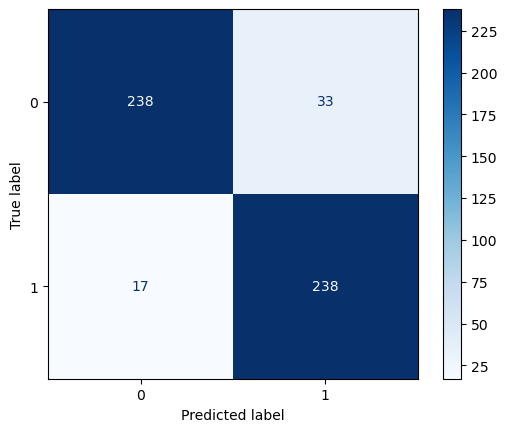

In [54]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [55]:
(238 + 238) / (238 + 238 + 33 + 17)

0.9049429657794676

In [41]:
238 / (238 + 17)

0.9333333333333333

In [42]:
238 / (238 + 33)

0.8782287822878229

In [43]:
2 * (0.9333333333333333 * 0.8782287822878229) / (0.9333333333333333 + 0.8782287822878229)

0.9049429657794678